Ce notebook contient des essais généraux concernant la descente de gradient.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Afin d'effectuer les tests, on place la grille des $z_k$ et on choisit les $\alpha_k$ de manière aléatoire.

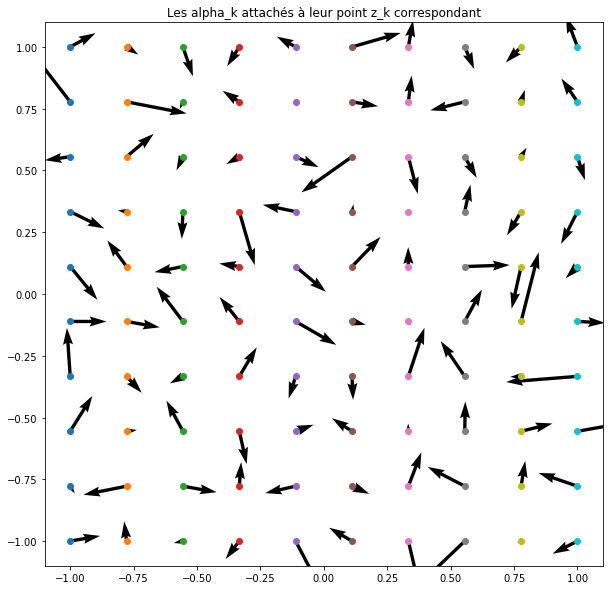

In [2]:
pas = 0.2
gauche = -1.0
droite = 1
h = int((droite - gauche)/pas)
D = h * h
zk_x, zk_y = np.meshgrid(np.linspace(gauche, droite, h),np.linspace(gauche, droite, h))
alphas_x = np.random.randn(h, h)
alphas_y = np.random.randn(h, h)

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(zk_x, zk_y, marker= 'o', linestyle='none');
plt.quiver(zk_x, zk_y, alphas_x, alphas_y)
plt.title("Les alpha_k attachés à leur point z_k correspondant")
plt.show()

Ensuite, implémentons un algorithme de descente de gradient. On utilise les méthodes suivantes :
  - approximation du gradient par la formule $$ \frac{\partial f}{\partial x_i} (a) \approx \frac{f(a + \varepsilon e_i) - f(a)}{\varepsilon}$$
  avec $\varepsilon$ petit.
  - « backtracking line search » pour choisir le learning rate à chaque étape. voir https://en.wikipedia.org/wiki/Backtracking_line_search
  
  

In [3]:
def gradient_descent(f, start, dim, iterations=1000, epsilon=0.0001, learning_rate_guess=10.0):
    if len(start) != dim:
        raise Exception("starting point must have right dimensions")
    #drawing stuff
    points_x, points_y = [], []
    
    
    # descent point
    point = start;
    # initialise gradient var
    grad = np.array([0.0] * dim)
    # canonical base: e[0] = (1, 0, 0, ...) and e[dim - 1] = (0, 0, ..., 1).
    e = np.identity(dim)
    
    # backline search parameters
    tau = 0.5
    c = 0.5
    
    # temp vars
    m = 0.0
    t = 0.0
    l = 0.0
    
    for i in range(iterations):
        
        # roughly estimate gradient
        # df/dx_i (a) = (f(a + epsilon * e_i) - f(a)) / epsilon
        for d in range(dim):
            grad[d] = (f(point + epsilon * e[d]) - f(point)) / epsilon;
            
        m = np.dot(grad, grad);
        
       
        # backtracking line search for learning rate
        t = -c*m;
        # initial guess for learning rate
        l = learning_rate_guess
        
        # evaluate just one time at the current point
        value = f(point);

        while (value - f(point - l * grad)) < l * t:
            l = tau * l;

        # apply learning rate
        point -= l * grad;
        
        
        # drawing stuff
        points_x.append(point[0]);
        points_y.append(point[1]);
    # fin boucle gradient
    
    p = len(points_x)
    for i in range(p):
        plt.plot(points_x[i],points_y[i], marker= 'o', linestyle='none');
    plt.show()

    return point;

Pour tester, appliquons cet algorithme à une fonction simple dont on connais déjà le minimum : $f(x,y) = x^2 + y^2$.

On constate que la qualité d'approximation de la solution (0,0) dépend fortement des paramètres choisis
- point de départ
- nombre d'itérations
- learning rate initial à partir duquel on fait une backline search


Gradient descent with params: start= [1, 1], it= 10, lr= 0.5


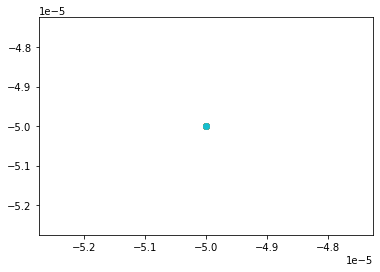

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 1.0


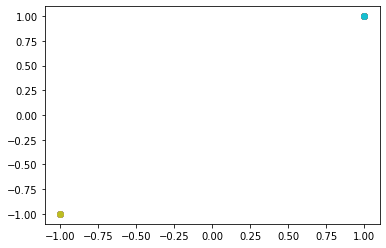

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 5.0


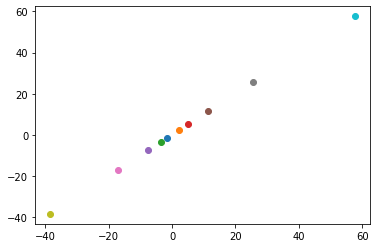

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 10.0


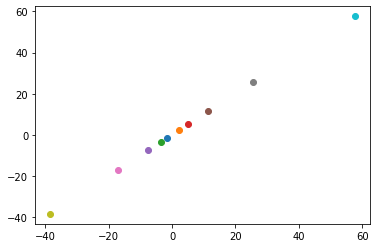

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 50.0


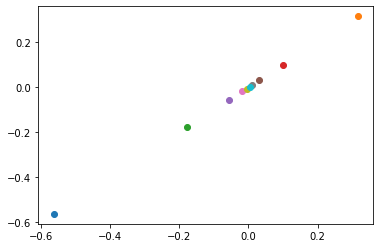

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 100.0


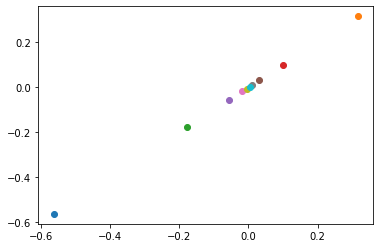

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 0.5


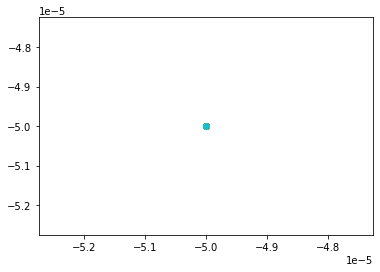

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 1.0


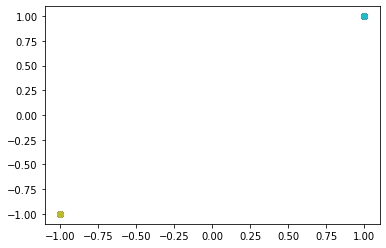

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 5.0


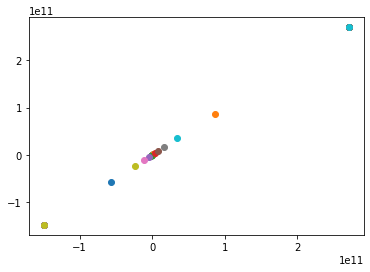

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 10.0


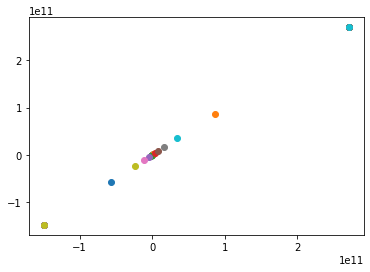

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 50.0


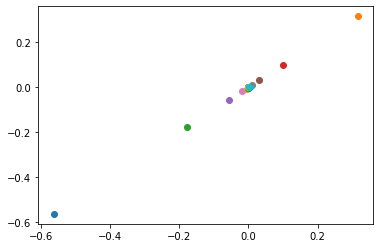

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 100.0


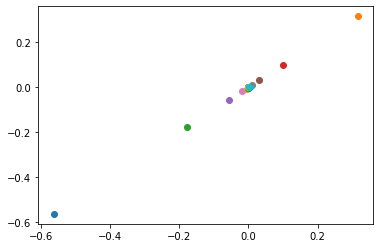

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 0.5


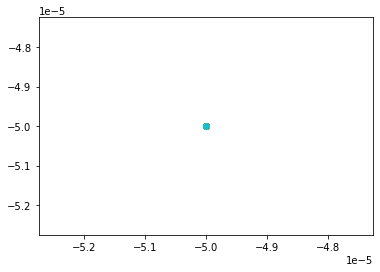

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 1.0


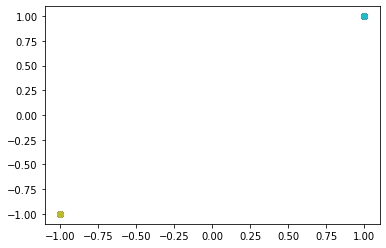

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 5.0


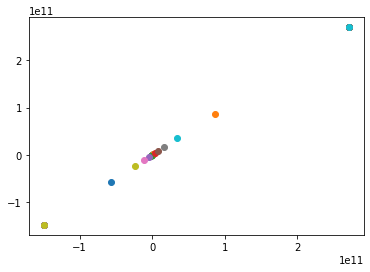

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 10.0


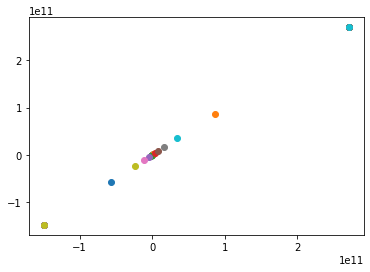

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 50.0


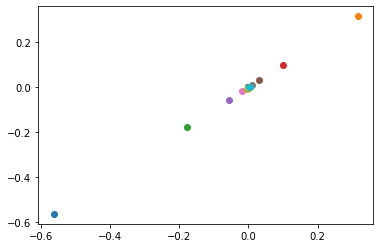

solution = [0.00146262 0.00146262]
--


Gradient descent with params: start= [1, 1], it= 1000, lr= 100.0


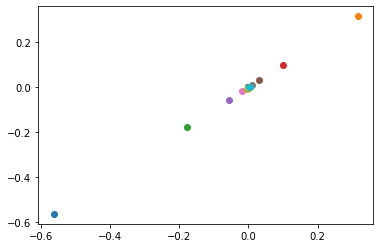

solution = [0.00146262 0.00146262]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 0.5


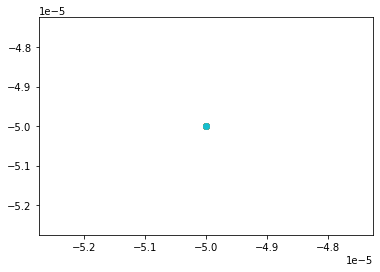

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 1.0


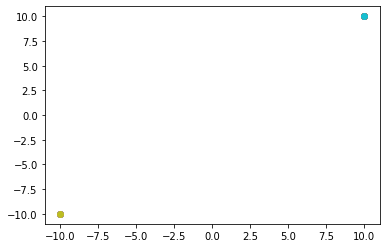

solution = [10. 10.]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 5.0


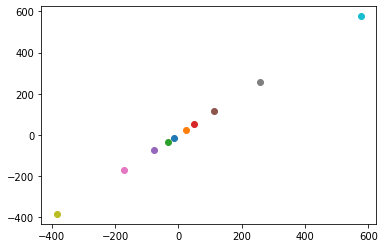

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 10.0


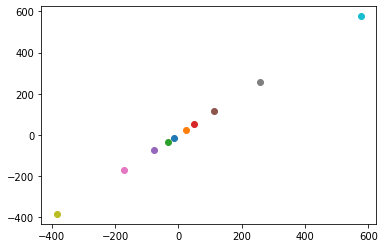

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 50.0


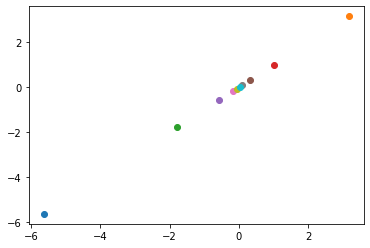

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 100.0


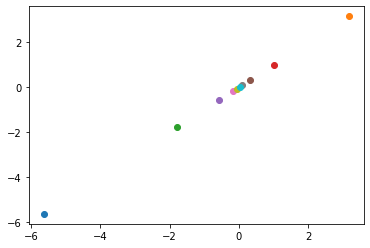

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 0.5


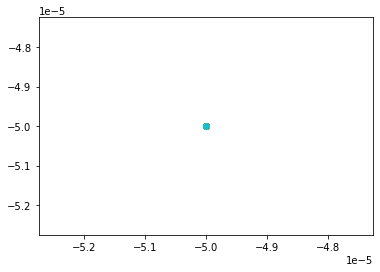

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 1.0


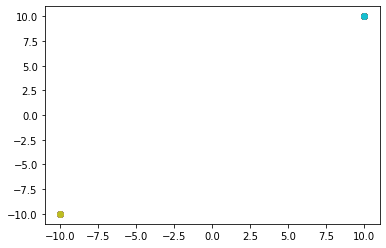

solution = [9.99999999 9.99999999]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 5.0


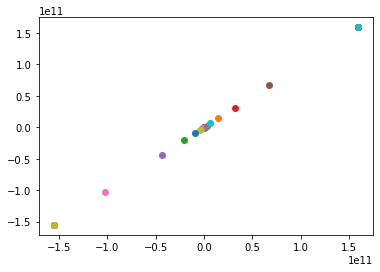

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 10.0


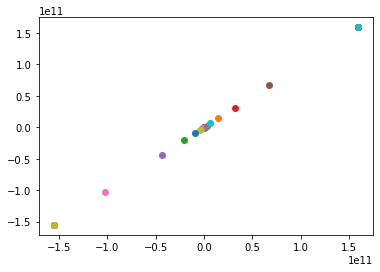

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 50.0


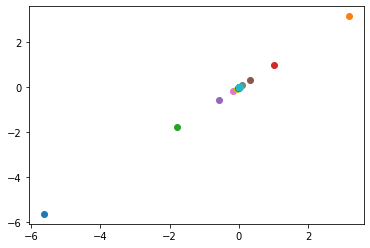

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 100.0


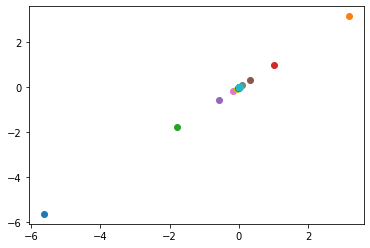

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 0.5


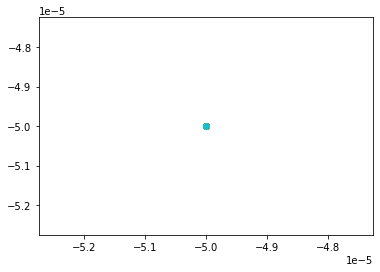

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 1.0


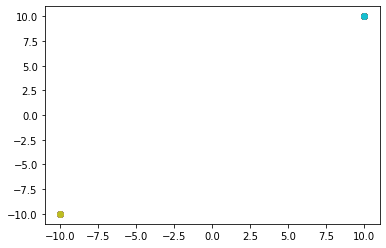

solution = [9.99999997 9.99999997]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 5.0


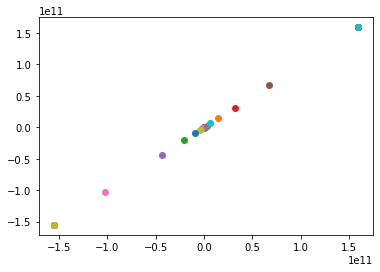

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 10.0


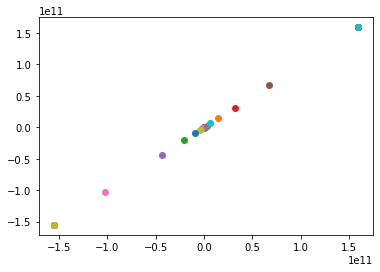

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 50.0


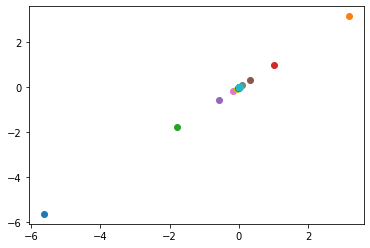

solution = [0.00100984 0.00100984]
--


Gradient descent with params: start= [10, 10], it= 1000, lr= 100.0


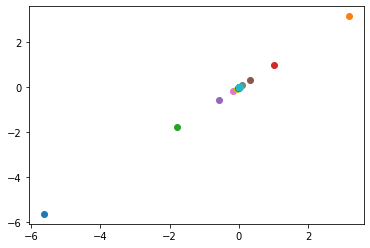

solution = [0.00100984 0.00100984]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 0.5


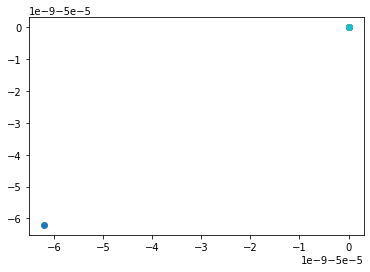

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 1.0


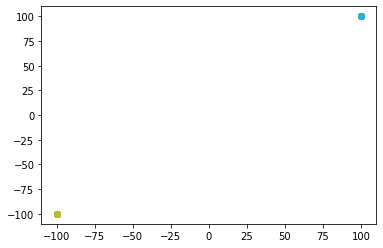

solution = [100.00000018 100.00000018]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 5.0


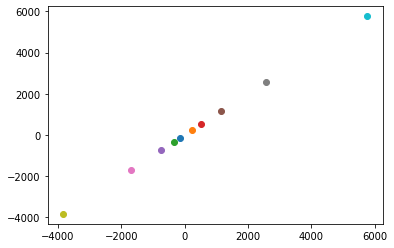

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 10.0


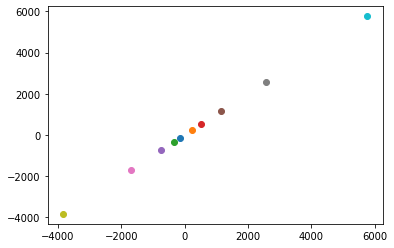

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 50.0


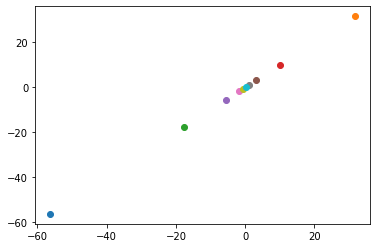

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 100.0


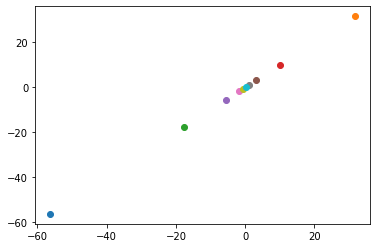

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 0.5


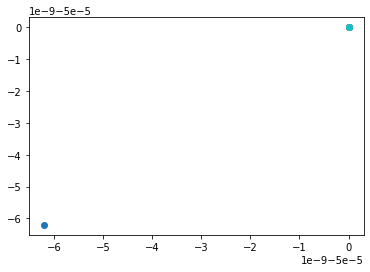

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 1.0


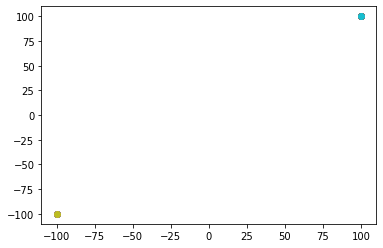

solution = [100.00000098 100.00000098]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 5.0


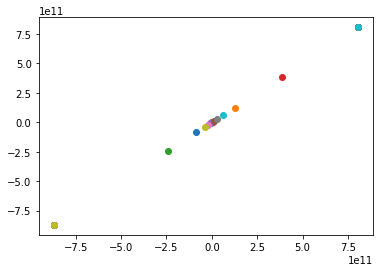

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 10.0


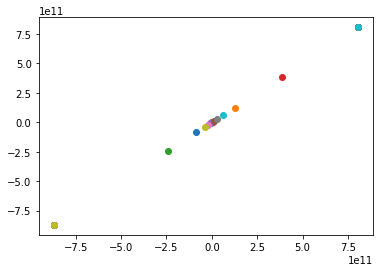

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 50.0


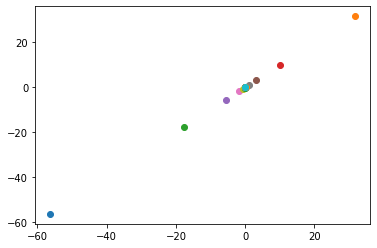

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 100.0


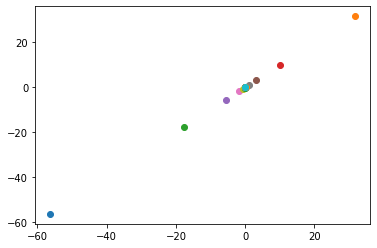

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 0.5


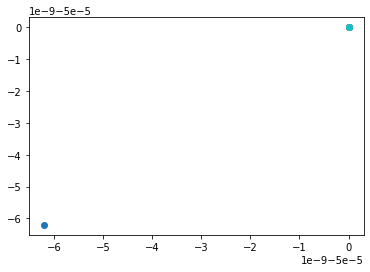

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 1.0


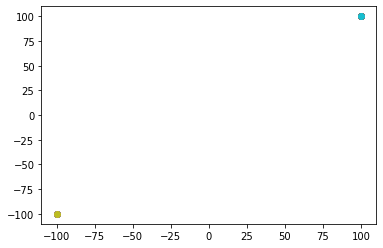

solution = [100.00000098 100.00000098]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 5.0


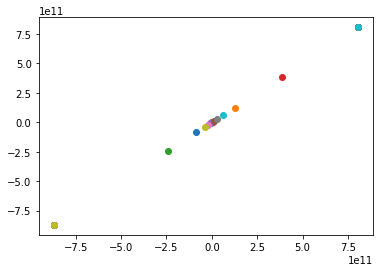

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 10.0


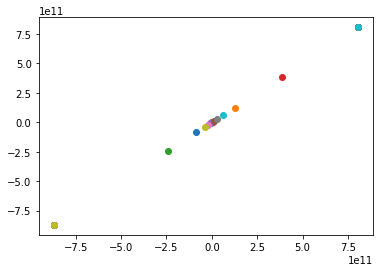

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 50.0


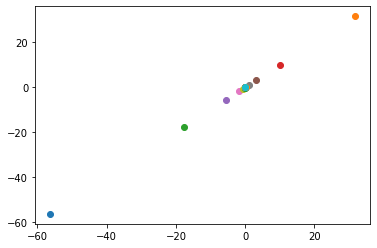

solution = [0.00069262 0.00069262]
--


Gradient descent with params: start= [100, 100], it= 1000, lr= 100.0


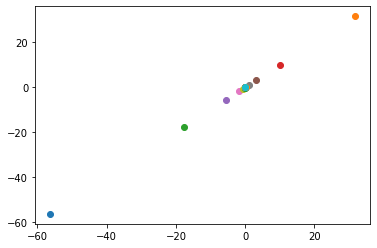

solution = [0.00069262 0.00069262]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 0.5


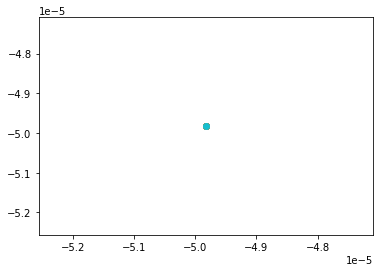

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 1.0


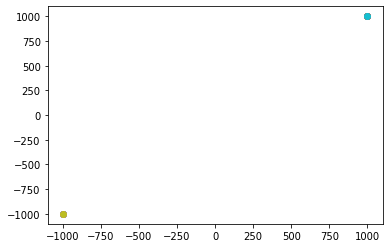

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 5.0


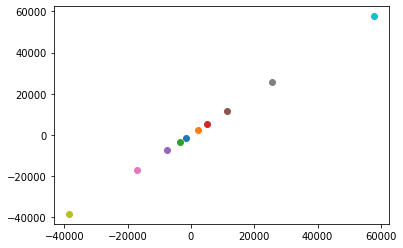

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 10.0


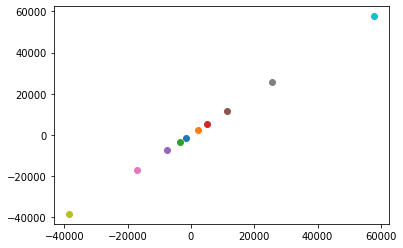

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 50.0


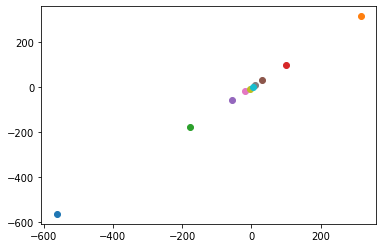

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 100.0


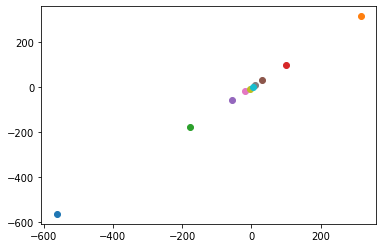

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 0.5


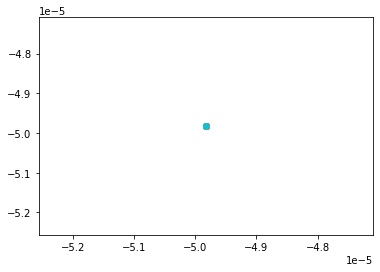

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 1.0


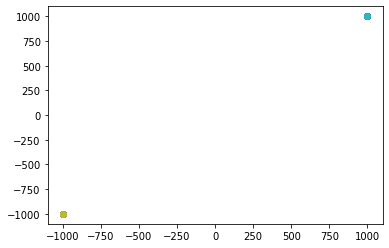

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 5.0


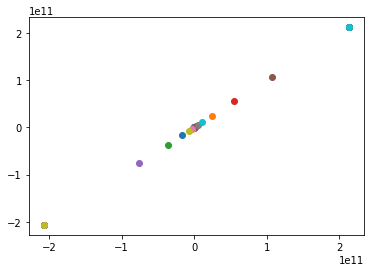

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 10.0


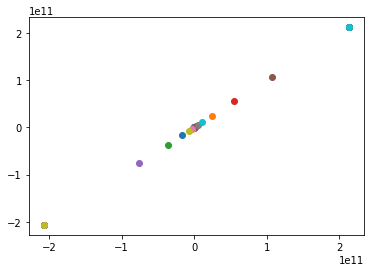

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 50.0


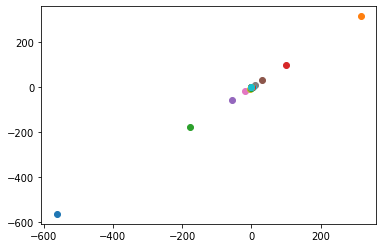

solution = [0.00110094 0.00110094]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 100.0


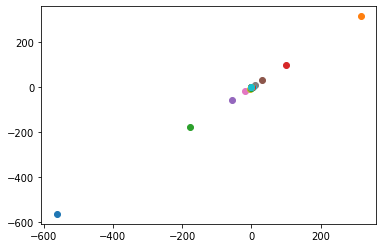

solution = [0.00110094 0.00110094]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 0.5


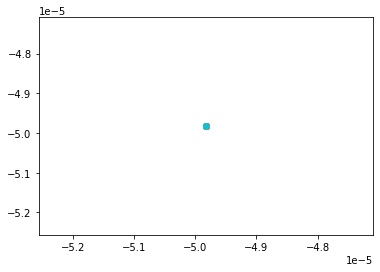

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 1.0


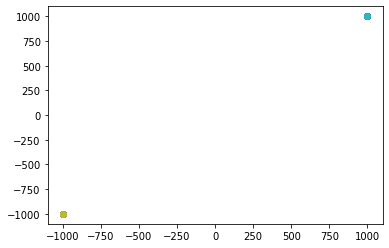

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 5.0


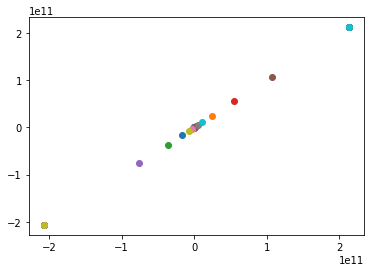

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 10.0


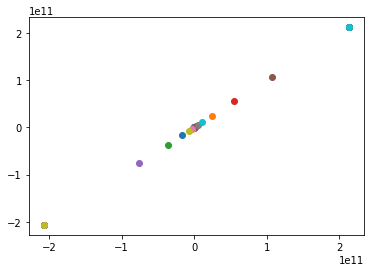

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 50.0


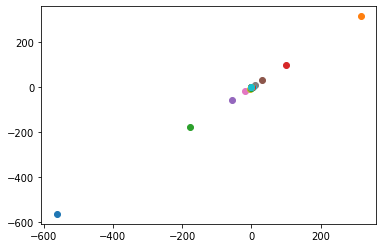

solution = [0.00047034 0.00047034]
--


Gradient descent with params: start= [1000, 1000], it= 1000, lr= 100.0


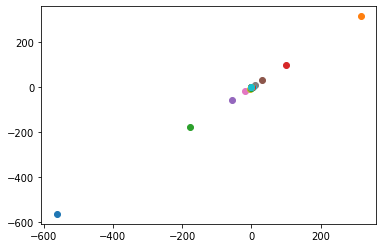

solution = [0.00047034 0.00047034]
--


done!


In [6]:


# La fonction à minimiser, ici de deux variables
def toto(param):
    return param[0] * param[0] + param[1] * param[1];

# dimension de l'espace ambiant
d = 2



import itertools

starting_points = [[1, 1], [10, 10], [100, 100], [1000, 1000]]
it = [10, 100, 1000]
lr = [0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = [starting_points, it, lr]

for param in itertools.product(*parameters):
    print("Gradient descent with params: start= {}, it= {}, lr= {}".format(param[0], param[1], param[2]))
    result = gradient_descent(toto, start=param[0], dim=d, iterations=param[1], learning_rate_guess=param[2]);
    print("solution =", result)
    print("--")
    print("")
    print("")

print("done!")

On veut maintenant appliquer la descente de gradient à notre fonctionnelle J $$J(v) = |v|^2 + \lambda D(\varphi_v(S), T)$$

On définit pour commencer la distance de Hausdorff.

In [5]:
def maxmin(A,B): # max sur les i du min sur les j, avec A et B des listes de k-uplets
    max_list = []
    for a in A:
        min_list = []
        for b in B:
            min_list.append(np.linalg.norm(a - b))
        max_list.append(np.min(min_list))
    return np.max(max_list)


# Distance de Hausdorff entre deux tableaux numpy.
def dist(A,B):
    return max(maxmin(A,B),maxmin(B,A))

A = np.array([[0., 0.], [1., 0.], [1., 1.]])

print(dist(A, A))

B = np.array([[0., 0.], [0., 1.], [1., 1.]])
print(dist(A, B))

B = np.array([[0., 0.], [0., 1.], [1., 1.], [1., 0.]])
print(dist(A, B))

0.0
1.0
1.0


Un élément $v$ sera encodé par ses coordonnées dans la base évoquée à la question 6 : $$v = \sum_{0 \leq k < D} v_k E_k, \text{  } v_k \in \mathbb{R}$$
    avec $$E_k(x) = \alpha_k e^{-|x - z_k|^2}$$

L'espace vectoriel $V$ est donc de dimension $D$, le nombre de $(z_k)$, ce qui sera donc la dimension utilisée pour la descente de gradient.